In [1]:
import nibabel as nib
import numpy as np
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,LogisticRegression
from sklearn.decomposition import TruncatedSVD, KernelPCA, PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt,atan2,pi,ceil,acos,sin,cos
from sklearn.metrics import hamming_loss
from skimage.exposure import equalize_hist,equalize_adapthist

from orelmisc import n_max,n_test_max,testpre,trainpre,saveCSV,shape_3d_org
from preprocess import flatten,flatten_each_sample,loadData,flatten_each_sample,precompute_and_save

In [2]:
prep_ = lambda i:cap(i)
def prep(a):
  return np.array(map(prep_single,a))

percent = lambda x:"%2.1f%%"%(x*100)

prep_single = lambda xs:map(prep_,xs)

cap = lambda p: 0 if p < 0.5 else 1
def pred_to_rgb(p):
  p = cap(p)
  v = p
  return (1-v,v,0.2)

y = np.zeros((n_max,3))
# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

result = None
xa = 0
x = None
x_t = None
TO_RADIANS = pi/180

In [3]:
space = 20 # 35,50,70,100,150
hSize = space-1
bins = np.linspace(1,1700,space)
#bins = np.linspace(0,1,space)
sbins = bins[:-1]+1800/space/2

r_division = 5
theta_division = 3
phi_division = 4
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin

x_division = 3
y_division = 3
z_division = 3

#ranges = [1,x_division,y_division,z_division]
#nBlocks = x_division*y_division*z_division
ranges = [1,r_division,theta_division,phi_division]
nBlocks = r_division*theta_division*phi_division
fnameSpherical = "spherical_every2.npy"
xSpherical = np.load(fnameSpherical)

bSize = hSize+2 # bsize means blockSize
ds = nBlocks*bSize # sum,sum2,sum3,avg,var,mode, numper of percentiles and histograms
iHist = 0
idxHist = lambda i: iHist+i*bSize
idxsFor = lambda i,many: np.array(range(idxHist(i)+hSize,idxHist(i)+hSize+many))

blockNr2Pos = np.zeros((nBlocks,3))

verboseIdx = lambda i: ["Block #",i/bSize," at",blockNr2Pos[i/bSize],"isHist:",i%bSize<hSize," and bin",i%bSize," or stat",i%bSize-hSize]


print "Number of Blocks:",nBlocks
print "Size of Histograms:",hSize
print "Numbers per Block:",bSize
print "Dimensions: ca.",nBlocks*bSize

def spherical2cart(r,theta,phi):
  return (r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta))

fromtoSpherical = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

from skimage.filters import sobel

#name = "output/"+str(space)+"_split_validated"
#fname = "many_hists_"+str(nBlocks)+"_space" + str(space) + ("_divs_%s_%s_%s.npy" % (r_division,theta_division,phi_division))

fname = "histsSize%s_stats_nBlocks%s_bSize%s_divs_%s_%s_%s.npy" % (hSize,nBlocks,bSize,r_division,theta_division,phi_division)
name = "output/%s" % fname[:-4]


def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    iD = i
    diff = 1
    max_diff = 45
    while i < n_max+n_test_max:
      if i > iD+min(diff,max_diff):
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
        diff = 2*diff
        iD = i
      
      #n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      #filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      #Xtotal,Ytotal,Ztotal = (176,208,176)
      #data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      #data = data[35:130,40:150,10:100]

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      i0=0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        i1=0
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          i2=0
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            
            blockNr2Pos[hCount] = [i0,i1,i2]
            
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            #cut = equalize_hist(cut)
            #sb = sobel(np.max(cut,axis=2))
            h=np.histogram(cut.ravel(),bins=bins)[0]
            xa[i,idxHist(hCount):(idxHist(hCount)+hSize)] = h
            #k0,k1,k2 = cut.shape
            #pos = np.arange(k0).reshape((k0,1,1)) + np.arange(k1).reshape((1,k1,1)) + np.arange(k2).reshape((1,1,k2))
            #pos2 = pos*pos
            avg = np.average(cut)
            std = np.std(cut)
            xa[i,idxsFor(hCount,2)] = [avg,std]
            #xa[i,idxsFor(hCount,2)+2] = [np.sum(pos*cut),np.sum(pos2*cut)]
            #xa[i,idxsFor(hCount,2)+4] = [np.average(sb),np.std(sb)/np.average(sb)]
            hCount = hCount + 1
            i2 = i2+1
          i1 = i1+1
        i0 = i0+1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

# switch to preprocess by setting True
if False:
  loadAndPreprocess()

#xa = np.load("many_hists144_space70_divs_6_4_6.npy")
xa = np.load(fname)
x,x_t = (xa[0:n_max,:],xa[n_max:,:])

print "Example:",xa[0,:20],"..."

Number of Blocks: 60
Size of Histograms: 19
Numbers per Block: 21
Dimensions: ca. 1260
Example: [    0.            25.           202.           328.           318.           505.
  1829.           248.           672.           376.           876.           643.
   581.           969.           575.           589.           264.             0.
     0.           866.17577778] ...


In [4]:
if False:
  i = 413
  for it,theta in enumerate(np.linspace(0,xSpherical[i].shape[1]-1,6)):
    print theta,("<","="*10) if 3<=it<5 else ""
    c = np.array(xSpherical[i,:,theta,:],copy=True)
    #c[int(5*c.shape[0]/ranges[0]):int(6*c.shape[0]/ranges[0]),int(3*c.shape[0]/7):int(4*c.shape[0]/7.0)] = c[int(5*c.shape[0]/7):int(6*c.shape[0]/7.0),int(3*c.shape[0]/7):int(4*c.shape[0]/7.0)]*4
    plt.imshow(c, cmap="gray", origin="lower")
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

# xtr. training data
# ytr. training targets
# xts. validation data
# yts. validation targets

b = [0,1]
types = [ [a1,a2,a3] for a1 in b for a2 in b for a3 in b if not (a2 is 1 and a3 is 0)]
Ntypes = len(types)

def get_by(t,ys):
    idxs = range(0,len(ys))
    return filter(lambda i:list(ys[i,:])==list(t),idxs)

#indices for splitting
typeIdxs = np.array([get_by(t,y) for t in types])
ratios = [float(len(i))/n_max for i in typeIdxs]

def show_diff_for(name,es1,es2,total):
  print es1,es2
  es = map(lambda x,y:x-y,es1,es2)
  abses = map(abs,es)
  print name,"contains",sum(abses)/2,"samples of total",total,": %0.2f%%" % (100*float(sum(abses))/total)
  for i in range(0,len(es1)):
      tp = ((100*float(es[i])/total),types[i],es[i])
      print "  %0.2f%%: %s with samples: #%s" % tp

def show_diff(name,es1,es2):
  es1 = map(len,es1)
  es2 = map(len,es2)
  show_diff_for(name,es1,es2,total=sum(es1))

def show_for(name,es):
  es1 = map(len,es)
  show_diff_for(name,es1,[0]*len(es1),sum(es1))

# splittingFor in [None,"3subclasses","8subclasses"]
# nonClassRep; percentage of samples not belonging to the class in each of the sub-splits
# The procedure will add so many nonClass samples to the split, until at least 30% don't belong to any class
# for None, this doSplit returns a tuple of elements.
# for the other arguments, doSplit list of such tuples

subclasses3 = [[0,1],[3,7],[4,5]]
def doSplit(test_size=0.25,rs=1,show=False,splittingFor=None,nonClassRep=0.3):
  
  assert(splittingFor in [None,"3subclasses","8subclasses"])
  
  def mkTuple(ttr,tts,lastIsNil,classes):
    ys = lambda i: [classes[i] if i < 2 else -1]
    return (ttr,tts,
             np.vstack([x[idxs] for idxs in ttr]),
             np.vstack([x[idxs] for idxs in tts]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(ttr)]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(tts)]) )
  
  subclasses3Return = []
  
  if splittingFor is None:
    typeIdxsTR = []
    typeIdxsTS = []
    for i in range(0,Ntypes):
        atr,ats,_,_ = train_test_split(typeIdxs[i],np.zeros(len(typeIdxs[i])),test_size=test_size,random_state=rs)
        typeIdxsTR.append(atr)
        typeIdxsTS.append(ats)
    typeIdxsTR = np.array(typeIdxsTR)
    typeIdxsTS = np.array(typeIdxsTS)
    # gender: 1 = female, 0 = male
    # age: 1 = young, 0 = old
    # health: 1 = healthy, 0 = sick
    if show:
      show_for("public Training",typeIdxs)
      show_for("our Training",typeIdxsTR)
      show_for("our Test",typeIdxsTS)
    return mkTuple(typeIdxsTR,typeIdxsTS,False,None)
      
  elif splittingFor is "3subclasses":
    for j in range(0,3):
      cl0 = subclasses3[j][0]
      cl1 = subclasses3[j][1]
      cl2 = list(set(range(0,6)).difference(set(subclasses3[j])))
      # suche minimales d, sodass
      # d/(len(typeIdxs[cl0])+len(typeIdxs[cl1])+d) >= 0.3
      # thus
      d = lambda xs,ys: int( (len(xs)+len(ys))*nonClassRep/(1-nonClassRep) )
      tIdxscl2 = np.array(sum(list(typeIdxs[cl2]),[]))
      cl0tr,cl0ts,_,_ = train_test_split(typeIdxs[cl0],np.zeros(len(typeIdxs[cl0])),test_size=test_size)
      cl1tr,cl1ts,_,_ = train_test_split(typeIdxs[cl1],np.zeros(len(typeIdxs[cl1])),test_size=test_size)
      cl2tr,cl2ts,_,_ = train_test_split(tIdxscl2,np.zeros(len(tIdxscl2)),test_size=test_size)
      typeIdxsTR = np.array( [list(cl0tr),list(cl1tr),list(cl2tr[:d(cl0tr,cl1tr)])])
      typeIdxsTS = np.array( [list(cl0ts),list(cl1ts),list(cl2ts[:d(cl0ts,cl1ts)])])
      if show:
        print "Subclasses:",j," containing types",types[cl0],"and",types[cl1]
      subclasses3Return.append(mkTuple(typeIdxsTR,typeIdxsTS,True,subclasses3[j]))
    return subclasses3Return

# [0,1,1] => [0,0,0,1,0,0,0,0]
def binary2monadic(y):
  ys = np.zeros((len(y),1))
  for i,yi in enumerate(y):
    # ys[i,int(yi[0]*4+yi[1]*2+yi[2])] = 1
    ys[i] = int(list(types).index(list(yi)))
  return ys

convertInt = lambda i:types[i]
#convertInt = lambda i:map(lambda x: 1 if int(x) is not 0 else 0,[int(i)&4,int(i)&2,int(i)&1])

def monadic2binary(y):
  #return np.array([convertInt(list(yi).index(1)) for yi in y])
  return np.array([convertInt(yi) for yi in y])

def continousMonadic2binary(y):
  ys = np.zeros((len(y),3))
  for i,yi in enumerate(y):
    #gender
    """a,b = (np.sum(yi[:4]),np.sum(yi[4:]))
    ys[i,0] = b/(a+b)
    #age
    a,b = (np.sum(yi[0:8:4]+yi[1:8:4]),np.sum(yi[2:8:4]+yi[3:8:4]))
    ys[i,1] = b/(a+b)

    #health
    a,b = (np.sum(yi[0:8:2]),np.sum(yi[1:8:2]))
    ys[i,2] = b/(a+b)"""
    ys[i] = convertInt(np.argmax(yi))
  return ys

In [6]:
if False:
  print doSplit(show=True,test_size=0.3,rs=1)

In [7]:
def prep_by_percentage(pi):
  nElems = len(pi)
  pi = pi.reshape((nElems,3))
  samplesNeeded = np.rint(np.floor(np.array(ratios)*0.7*nElems))
  for r in range(0,nElems):
    s = np.array(samplesNeeded,copy=True)
    s[s <= 0] = np.max(s)+1
    if len(samplesNeeded[samplesNeeded>0]) is 0:
      break
    i = np.argmin(s)
    ti = np.array(types[i])
    # find nearest prediction for this type
    dx = pi-ti
    dx[dx==0] = np.max(dx)+1
    j = np.argmin(np.sum(dx*dx,axis=1))
    pi[j] = ti
    samplesNeeded[i]=samplesNeeded[i]-1
  
  return np.array(prep(pi))
  
# prep_single_by_percentage(np.random.random((50,3)))

In [8]:
def visualize(labelName,y_pred,model,do,prefix,mcl):
  total = int(len(y_pred)*0.7)
  zeros = int(len(filter(lambda x:x == 0,y_pred))*0.7)
  print labelName," ","0"*zeros,"#","1"*(total-zeros),"***"
  if mcl in ["ovr","ovo"]:
    return
  if do[0] is "a":
    plt.plot(model.estimator_errors_)
    plt.title("Estimator errors")
    plt.savefig(prefix+"_"+str(labelName)+".png")
    plt.show()
  if do is "rf":
    print "Out-of-bag Score: %s" % model.oob_score_
    a = model.feature_importances_
    ai = np.argsort(-a)
    print "Important features: %s..." % ai[:6]
    for i in ai[:6]:
      print verboseIdx(i)
    plt.plot(a[ai])
    plt.show()
    print "\n"
  if do is "ks":
    print "Using #",len(model.support_),"# support vectors"
  if do is "aks":
    print "Using average #",np.average([len(m.support_) for m in model.estimators_]),"# support vectors"

def savePrediction(ys,prefix):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

def applyClassification(model,label,preprocess=None,uni=False,addXTR=None,addXTS=None,addX_T=None,split=None,
                         trainOnly=False,threeClassifiers=False):
  (_,_,xtr,xts,ytr,yts) = split
  if label is None:
    get_label = lambda ys: ys
  else:
    get_label = lambda ys: ys[:,label]
  if addXTR is None:
    xtr1 = xtr
    xts1 = xts
    x_t1 = x_t
  else:
    xtr1 = np.concatenate((xtr,addXTR),axis=1)
    xts1 = np.concatenate((xts,addXTS),axis=1)
    x_t1 = np.concatenate((x_t,addX_T),axis=1)
  
  # normalize data
  xtrAvg = np.average(xtr,axis=0)
  xtrStdDev = np.std(xtr,axis=0)
  xtr1 = (xtr1 - xtrAvg)/(xtrStdDev+0.00001)
  xts1 = (xts1 - xtrAvg)/(xtrStdDev+0.00001)
  x_t1 = (x_t1 - xtrAvg)/(xtrStdDev+0.00001)
  
  xtr1 = preprocess.fit_transform(xtr1) if preprocess is not None else xtr1
  xts1 = preprocess.transform(xts1) if preprocess is not None else xts1
  x_t1 = preprocess.transform(x_t1) if preprocess is not None else x_t1
  
  if uni:
    yts_pred = model.fit(xtr1,get_label(ytr)).predict_proba(xts1)
    ytr_pred = model.predict_proba(xtr1)
    y_t_pred = model.predict_proba(x_t1)
  else:
    yts_pred = model.fit(xtr1,get_label(ytr)).predict(xts1)
    ytr_pred = model.predict(xtr1)
    y_t_pred = model.predict(x_t1)
    
  
  if not uni and not threeClassifiers:
    #y_t_pp = prep_single(y_t_pred)
    yts_pp = prep_single(yts_pred)
    ytr_pp = prep_single(ytr_pred)

    trCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(ytr),ytr_pp)))
    tsCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(yts),yts_pp)))
    ltr = 100*hamming_loss(get_label(ytr),ytr_pp)
    lts = 100*hamming_loss(get_label(yts),yts_pp)

    print "|   %3d    /    %3d    |   %3d   /     %3d    |    %3.1f%%     |     %3.1f%%     |" % (trCorrect,len(xtr)-trCorrect,tsCorrect,len(xts)-tsCorrect,ltr,lts)
  else:
    ltr,lts = (0,0)
    
  return model,ltr,lts,ytr_pred,yts_pred,y_t_pred

import random

def applyClassificationSeparated(classf,
                                 predictGenderFromAgeHealth,prepPercentage,preprocess,uni,threeClassifiers,
                                 nonClassRep,trs,test_size,n_splits):
  prefix = classf[0]
  # TODO: copy output to file
  
  doPrep = lambda xs: prep_by_percentage(xs) if prepPercentage else prep(xs)
  
  print "### Prediction with ###\n","  ",prefix,"\n"
  
  results = []
  
  #using a random_state for the test case splitting. it needs to be different for each split, thus the index of
  # the split is added to a factor of the trs. for different values of trs (0,1,2,...) it will produce very different splits
  splits = [doSplit(test_size=test_size,rs=i+30*trs,
                    splittingFor="3subclasses" if threeClassifiers else None,
                    nonClassRep=nonClassRep) for i in range(0,n_splits)]
  
  print "| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |"
  print "|  correct / incorrect | correct / incorrect  |   Training   |    Test      |"
  
  for i,splitO in enumerate(splits):
    print "============== SPLIT # %s # ================" % i
    
    splitss = [splitO]
    
    subClassResults = []
    for j,split in enumerate(splitss):
      _,_,_,_,ytr,yts = split
      if uni:
        split2 = (split[0],split[1],split[2],split[3],binary2monadic(ytr),binary2monadic(yts))
        models,ltr,lts,ytr_pred_real_m,yts_pred_real_m,y_t_pred_real_m = applyClassification(classf[1],
                                                                                   label=None,preprocess=preprocess,
                                                                                   uni=uni,split=split2)
        ytr_pred_real = continousMonadic2binary(ytr_pred_real_m)
        yts_pred_real = continousMonadic2binary(yts_pred_real_m)
        y_t_pred_real = continousMonadic2binary(y_t_pred_real_m)
      else:
        model2,ltr2,lts2,ytr_pred2,yts_pred2,y_t_pred2 = applyClassification(classf[1],1,preprocess=preprocess,split=split)
        model3,ltr3,lts3,ytr_pred3,yts_pred3,y_t_pred3 = applyClassification(classf[1],2,preprocess=preprocess,split=split)
        addXTR = None
        addXTS = None
        addX_T = None
        if predictGenderFromAgeHealth:
          addXTR = np.stack((ytr_pred2,ytr_pred3),axis=1)
          addXTS = np.stack((yts_pred2,yts_pred3),axis=1)
          addX_T = np.stack((y_t_pred2,y_t_pred3),axis=1)

        model1,ltr1,lts1,ytr_pred1,yts_pred1,y_t_pred1 = applyClassification(
                  classf[1],0,addXTR=addXTR,addXTS=addXTS,addX_T=addX_T,preprocess=preprocess,split=split)

        ytr_pred_real = np.array([ytr_pred1,ytr_pred2,ytr_pred3]).transpose()
        yts_pred_real = np.array([yts_pred1,yts_pred2,yts_pred3]).transpose()
        y_t_pred_real = np.array([y_t_pred1,y_t_pred2,y_t_pred3]).transpose()
        models = [model1,model2,model3]
      
      if not threeClassifiers:
        y_pred_T = doPrep(y_t_pred_real)
        y_pred_tr = doPrep(ytr_pred_real)
        y_pred_ts = doPrep(yts_pred_real)
        y_t_pred = y_pred_T
        ltr = 100*hamming_loss(ytr,y_pred_tr)
        lts = 100*hamming_loss(yts,y_pred_ts)
    
    print "|                     Total                   |    %3.1f%%     | >>  %3.1f%%  << |" % (ltr,lts)

    results.append([y_t_pred,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models])
    
  return results

In [9]:
def doStuff(do="rf",al=15,comps=n_max-1,n_est=120,k1="rbf",
            max_depth=7,msplit=10,feats=0.3,samps=0.3,rs=0,nn=20,weights="distance",p=2,prepPercentage=False,
            kpcaK="rbf",preprocess=None,uni=True,mcl=None,test_size=0.25,n_splits=5,threeClassifiers=False,
            nonClassRep=0.3,lr=1.0,trs=0,solver="liblinear",penalty="l2",
            kernel="rbf",coef0=1,deg=3,gamma=1.0/600,C=80,n_comps=15,f=0.5,msp=15,pgah=False):
  
  print "Number of Blocks:",nBlocks
  print "Size of Histograms:",hSize
  print "Numbers per Block:",bSize
  print "Dimensions: ca.",nBlocks*bSize
  
  if do is "gbc":
    prefix = "%s_GradientBoostingClassifier_n%s_lr%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,lr,f,msp,max_depth,rs)
    model = GradientBoostingClassifier(n_estimators=n_est,max_features=f,
                                       learning_rate=lr,loss='deviance',
                                       min_samples_split=msp,max_depth=max_depth,random_state=rs)
  elif do is "lr":
    prefix = "%s_LogisticRegression_C%s_solver_%s_penalty_%s_rs%s_" %(name,C,solver,penalty,rs)
    model = LogisticRegression(C=C,solver=solver,penalty=penalty,dual=False,random_state=rs,n_jobs=-1)
  elif do is "rf":
    prefix = "%s_RandomForest_n%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,f,msp,max_depth,rs)
    model = RandomForestClassifier(n_est,max_features=f,oob_score=True,n_jobs=-1,
                                   min_samples_split=msp,max_depth=max_depth,random_state=rs)
  elif do is "rfm":
    prefix = "%s_RandomForest_n%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,f,msp,max_depth,rs)
    model = [ RandomForestClassifier(n_est1,max_features=f1,oob_score=True,n_jobs=-1,
                                   min_samples_split=msp,max_depth=md,random_state=rs)
              for n_est1,f1,md in zip(n_est,f,max_depth)]
  elif do is "al":
    prefix = "%s_AdaLasso_Alpha%s_n_est%s_rs%s"%(name,al,n_est,rs)
    model = AdaBoostRegressor(Lasso(alpha=al),n_estimators=n_est,random_state=rs)
  elif do is "ks":
    prefix = "%s_kSVM_kernel%s_C%s_def%s_coef0_%s_rs%s"%(name,kernel,C,deg,coef0,rs)
    model = SVC(kernel=kernel,C=C,degree=deg,coef0=coef0,random_state=rs,probability=True)
  elif do is "aks":
    prefix = "%s_Ada_n_est%s_rs%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,n_est,rs,kernel,C,deg,coef0)
    model = AdaBoostRegressor(SVC(kernel=kernel,C=C,degree=deg,coef0=coef0),n_estimators=n_est,random_state=rs)
  elif do is "nn":
    prefix = "%s_NN_nn%s_weights_%s_p%s"%(name,nn,weights,p)
    model = KNeighborsRegressor(n_neighbors=nn,weights=weights,p=p)
  
  if mcl is "ovo":
    uni = True
    print "Setting uni to True because of mcl == ovo"
    prefix = prefix + "_OVO"
    model = OneVsOneClassifier(model)
  elif mcl is "ovr":
    uni = True
    print "Setting uni to True because of mcl == ovr"
    prefix = prefix + "_OVR"
    model = OneVsRestClassifier(model)
  
  if preprocess is "kpca":
    prefix="%s_KPCA_%s"%(prefix,kernel)
    preprocess = KernelPCA(kernel=kpcaK)
  elif preprocess is "svd":
    prefix="%s_SVD_n%s"%(prefix,n_comps)
    preprocess = TruncatedSVD(n_components=n_comps)
  else:
    preprocess = None
  
  if uni:
    prefix = prefix + "_UNIFIED"
    
  prefix = "%s_TEST_SIZE%s_n%s_trs%s" % (prefix,test_size,n_splits,trs)
  
  # results = [(y_pred_T,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models),...]
  results = applyClassificationSeparated((prefix,model),preprocess=preprocess,
                                                                           predictGenderFromAgeHealth=pgah,
                                                                          prepPercentage=prepPercentage,
                                                                          uni=uni,threeClassifiers=threeClassifiers,
                                                                          test_size=test_size,trs=trs,
                                                                          nonClassRep=nonClassRep,
                                                                          n_splits=n_splits)
  # compute average predictions:
  #ytrs = np.average([r[1][0] for r in results],axis=0)
  #ytss = np.average([r[1][1] for r in results],axis=0) # Does not make sense. because these can be different.
  yt_real = np.average([r[1][2] for r in results],axis=0)
  
  ltravg = np.average([r[3] for r in results],axis=0)
  ltsavg = np.average([r[4] for r in results],axis=0)
  ltrstd = np.std([r[3] for r in results],axis=0)*n_splits/(n_splits-1) # empirical std, estimation
  ltsstd = np.std([r[4] for r in results],axis=0)*n_splits/(n_splits-1)
  
  if prepPercentage:
    y_pred_T = prep_by_percentage(yt_real)
  else:
    y_pred_T = prep(yt_real)

  print "\n### ltr %3.1f%% (+/- %2.2f) | ===== lts %3.1f%% (+/- %2.2f) ==== ###\n" % (ltravg,ltrstd,ltsavg,ltsstd)
  
  prefix = "%s_ltsavg%.3f_ltsstd%.3f"%(prefix,ltsavg/100,ltsstd/100)
  
  models = results[-1][5]
  
  if mcl is "ovr":
    print "Accuracies (for last model):"
    for i,m in enumerate(models.estimators_):
      if do is "rf":
        print "Class",types[i],"oob_score:",m.oob_score_
      elif do is "ks":
        scr = m.score(x[typeIdxs[i]],binary2monadic(y[typeIdxs[i]]))
        print "Class",types[i],"with",len(m.support_),"support vectors with score ",percent(scr)
        minDists = np.min(models.decision_function(x[typeIdxs[i]]),axis=1)
        print "min / median / max : %d / %d / %d" % (int(np.median(minDists)),int(np.min(minDists)),int(np.max(minDists)))
      elif do is "lr":
        idxs = range(0,len(m.coef_[0]))
        scr = m.score(x[typeIdxs[i]],binary2monadic(y[typeIdxs[i]]))
        scr = "%2.2f"%(100*scr)
        print "Class",types[i],", score",scr,", important features:",sorted(idxs,key=lambda i:-abs(m.coef_[0][i]))[:7]
    if do is "gbc":
      print "Class [i]  |  Training Score... (Sum) | Important Features"
      for i,m in enumerate(model.estimators_):
        a = m.feature_importances_
        ai = np.argsort(-a)
        print " %s %s | %s... (%3.3f) | %s... " % (i,types[i],m.train_score_[:3],np.sum(m.train_score_),ai[:6])
  
  if uni:
    models = [models,models,models]
  visualize("Gender",y_pred_T[:,0],models[0],prefix=prefix,do=do,mcl=mcl)
  visualize("Age   ",y_pred_T[:,1],models[1],prefix=prefix,do=do,mcl=mcl)
  visualize("Health",y_pred_T[:,2],models[2],prefix=prefix,do=do,mcl=mcl)
  

    
  # Plot 3D:
  fig = plt.figure(figsize=(10,5))

  ax = fig.add_subplot(221, projection='3d')
  ns = lambda x,n: np.random.random((n))*0.2
  xs = y[:,0]+ns(0,n_max)
  ax.scatter(xs, y[:,1]+ns(0,n_max), y[:,2]+ns(0,n_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Training distribution")
  ax.view_init(azim=20)

  ax = fig.add_subplot(223, projection='3d')
  xs = yt_real[:,0]+ns(0,n_test_max)
  ax.scatter(xs, yt_real[:,1]+ns(0,n_test_max), yt_real[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Public Test predictions")
  ax.view_init(azim=20)

  ax = fig.add_subplot(224, projection='3d')
  xs = y_pred_T[:,0]+ns(0,n_test_max)
  ax.scatter(xs, y_pred_T[:,1]+ns(0,n_test_max), y_pred_T[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  ax.set_title("Public Test finalized")
  fig.savefig(prefix+"_3D.png")
  plt.show()
  
  savePrediction(y_pred_T,prefix)
  
  result = {
      "res":results,
    "ltrs":[r[3] for r in results],
    "ltss":[r[4] for r in results],
    "ltsavg":ltsavg,
    "ltsstd":ltsstd
  }
  return result

Number of Blocks: 60
Size of Histograms: 19
Numbers per Block: 21
Dimensions: ca. 1260
Setting uni to True because of mcl == ovr
### Prediction with ###
   output/histsSize19_stats_nBlocks60_bSize21_divs_5_3_4_LogisticRegression_C10.0_solver_lbfgs_penalty_l2_rs0__OVR_UNIFIED_TEST_SIZE0.2_n10_trs3 

| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |
|  correct / incorrect | correct / incorrect  |   Training   |    Test      |
============== SPLIT # 0 # ================
|                     Total                   |    0.0%     | >>  11.5%  << |
============== SPLIT # 1 # ================
|                     Total                   |    0.0%     | >>  12.6%  << |
============== SPLIT # 2 # ================
|                     Total                   |    0.0%     | >>  13.2%  << |
============== SPLIT # 3 # ================
|                     Total                   |    0.0%     | >>  17.2%  << |
============== SPLIT # 4 # ================
|           

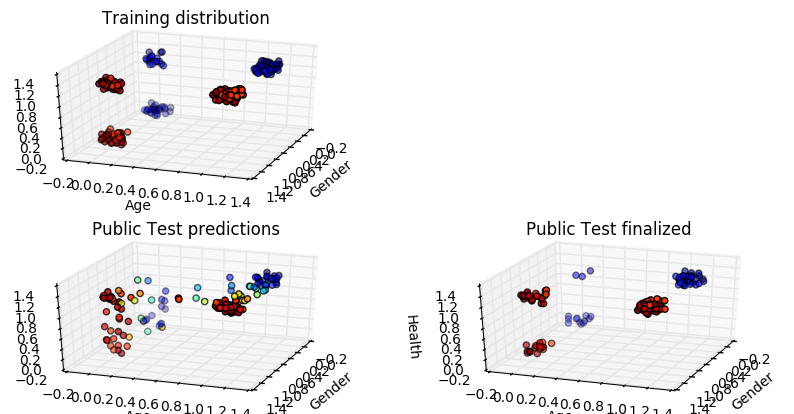

Saved predictions into output/histsSize19_stats_nBlocks60_bSize21_divs_5_3_4_LogisticRegression_C10.0_solver_lbfgs_penalty_l2_rs0__OVR_UNIFIED_TEST_SIZE0.2_n10_trs3_ltsavg0.140_ltsstd0.028.csv


In [10]:
result = doStuff(
  preprocess="none",n_comps=25,kpcaK="poly",
  #do = "nn",nn=15,weights="distance",p=1,
  #do = "aks",n_est=20,kernel="linear",gamma=1e2,coef0=1,deg=2,k1="poly",C=1e-10,
  #do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=3,k1="poly",C=1e3,
  #uni = True, mcl="ovr", do = "gbc",n_est=35,lr=1.0,f=0.3,msp=3,max_depth=2,rs=1,
  uni = True, mcl="ovr", do = "lr",C=1e1,solver="lbfgs",rs=0,penalty="l2",
  #uni = True, mcl="ovr", do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=3,k1="poly",C=2.1544e18,rs=0,
  #do = "al",n_est=30,al=1e-15,
  #do = "rf",n_est=300,f=0.3,msp=3,max_depth=3,rs=1,
  prepPercentage = False,
  pgah = False,
  # uni = False, mcl="ovr",# mcl="ovo"
  test_size=0.2,n_splits=10,trs=3,
  #do = "rfm",n_est=[50,80,70],f=[0.4,0.4,0.6],msp=3,max_depth=[3,3,4],rs=1,threeClassifiers=True,nonClassRep=0.2,
  msplit=70)

In [114]:
# DONE: Results in the file

from itertools import product
import multiprocessing as mp
from joblib import Parallel,delayed
import time
# do grid search
# polynomial kernel: C, deg, coef0, test_size
# searched over: params = np.logspace(-15,35,10), [1,2,3], [0,1], [0.2,0.25,0.3]

# polynomial kernel: C, deg, coef0, test_size
params = np.logspace(-15,35,10), [1,2,3], [0,1], [0.2,0.25,0.3]

xs = list(product(*params))
print "====================== START ====================== "
print "Combinations:",len(xs),",",xs[:5],"..."

def trySolution(t):
  C,deg,coef0,test_size = t
  results = doStuff(uni=True,mcl="ovr",do="ks",
                    kernel="poly",coef0=coef0,deg=deg,C=C,
                    test_size=test_size,n_splits=10)
  return list(t)+[np.min(results["ltss"]),np.max(results["ltss"]),results["ltsavg"],results["ltsstd"]]

def test(t):
  C,deg,coef0,test_size = t
  print t
  return list(t)

#results = Parallel(n_jobs=-1)(delayed(trySolution)(x) for x in xs)
#np.save("GridSearch_ovr_ks_kernel_poly_n_splits10_lts_minmax_ltsavg_ltsstd",np.array(results))

print "================ FIN ======================"
print "Saved results"

====================== START ====================== 
Combinations: 180 , [(1.0000000000000001e-15, 1, 0, 0.2), (1.0000000000000001e-15, 1, 0, 0.25), (1.0000000000000001e-15, 1, 0, 0.3), (1.0000000000000001e-15, 1, 1, 0.2), (1.0000000000000001e-15, 1, 1, 0.25)] ...
================ FIN ======================
Saved results


===================================================================================================================
### Next steps
* take a look at the empirical distribution (Anteile) of the predicted classes.
   All the real-valued predictions can be plotted in a 3D plot :)
   If there are too few (many) predictions in a class (by comparision to Anteile in training set),
   then move the closest other samples to our class (furthest of current samples to another class).
* Focus on Amygdala and Hippocampus for classification
* Fit a classifier for each of the eigth classes
* Make three calssifiers. one for big, one for small, one for big/small
* Use Age and Health for improving Gender Prediction, DONE, no improvement
* Use image processing features
* pie output to file and save it as well
* Wellenfeldinteraktionen (FT and Sum)
* use neural networks for spatial information
* male => more amount of grey matter
* Show the most-frequently used decision attributes for RandomForest, DONE

## TODO: class [0,0,1] is underrepresented... increase it!
* TODO: Visualize important places in spherical coordinates.
* Then goo deeper in that part of the brain :)

In [47]:
if False:
  Xtotal,Ytotal,Ztotal = (176,208,176)
  data = nib.load("set_train/train_123.nii").get_data().reshape((Xtotal,Ytotal,Ztotal))
  plt.clf()
  for theta in np.linspace(40,150,10):
    print theta
    plt.figure(figsize=(9,2))
    plt.imshow(data[35:130,theta,10:100].T, cmap="gray", origin="lower")
    plt.show()

In [48]:
print types
print binary2monadic(types)
r = np.random.random((1,8))
print r
print continousMonadic2binary(r)

[[0, 0, 0], [0, 0, 1], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1]]
[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
[[ 0.50952884  0.43878739  0.56538353  0.58980125  0.90459634  0.33469687
   0.27986313  0.54475269]]
[[ 1.  0.  1.]]


In [49]:
r = map(lambda x:int(x*100),ratios)
for i in range(0,6):
  print types[i],str(r[i])+"%",(r[i]*"=")

[0, 0, 0] 10% ==========
[0, 0, 1] 6% ======
[0, 1, 1] 22% ======================
[1, 0, 0] 14% ==============
[1, 0, 1] 17% =================
[1, 1, 1] 29% =============================
